In [185]:
# Importing basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import scipy.stats as spstats
from sklearn.neighbors import LocalOutlierFactor
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression

In [109]:
import warnings
warnings.filterwarnings('ignore')

In [236]:
data1 = pd.read_csv('data_final_updated.csv')
data1.head(5)

,Fine_Mode_AOD,Coarse_Mode_AOD,FineModeFraction,Angstrom_Exponent(AE),AI,AT,CO_MF,HCHO_Amount,NO2_Column,Scattering_angle,SO2_Column,SSA,Aerosol_Type
0,0.247573,0.714677,0.257638,0.046911,1.25,297.203186,132.400611,3.780000e+15,2.030000e+15,147.560772,0.01,0.96,UN
1,0.191937,0.592357,0.245434,0.076761,1.41,299.078400,141.535519,5.420000e+14,1.350000e+15,152.073428,-0.02,0.94,DU
2,0.148843,0.554267,0.211106,0.128248,1.32,300.142120,145.454993,1.960000e+15,2.040000e+15,101.697066,0.06,0.95,UN
3,0.179571,0.606988,0.228706,0.214991,1.31,300.032562,141.829289,5.710000e+15,2.990000e+15,165.031530,0.37,0.93,DU
4,0.190570,0.289585,0.396209,0.381665,-0.05,304.467529,133.802315,3.680000e+15,2.080000e+15,146.463070,-0.05,0.94,DU


In [237]:
data1.describe()

,Fine_Mode_AOD,Coarse_Mode_AOD,FineModeFraction,Angstrom_Exponent(AE),AI,AT,CO_MF,HCHO_Amount,NO2_Column,Scattering_angle,SO2_Column,SSA
count,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1.020000e+03,1.020000e+03,1020.000000,1020.000000,1020.000000
mean,0.130944,0.195187,0.491484,0.857300,0.581431,297.634826,122.170467,-4.290128e+14,2.320934e+15,129.366379,0.198775,0.937137
std,0.084409,0.205670,0.206620,0.462345,0.851304,8.489408,17.777859,6.582484e+16,9.986940e+14,24.483861,0.244932,0.023343
min,0.006642,0.000417,0.127253,-0.068608,-0.830000,266.380000,76.310000,-1.140000e+18,-3.590000e+14,91.239998,-0.800000,0.870000
25%,0.065475,0.043717,0.327838,0.488322,0.150000,295.623069,109.230780,2.120000e+15,1.650000e+15,107.298735,0.050000,0.920000
50%,0.115030,0.157461,0.456027,0.823550,0.490000,300.405579,118.857375,3.735000e+15,2.170000e+15,128.135000,0.150000,0.940000
75%,0.179636,0.270244,0.632285,1.137694,0.860000,303.472260,134.945226,5.310000e+15,2.820000e+15,147.483290,0.310000,0.950000
max,0.608720,2.417004,0.990908,2.276908,14.850000,308.500000,178.844988,1.120000e+18,7.070000e+15,175.271882,2.270000,1.000000


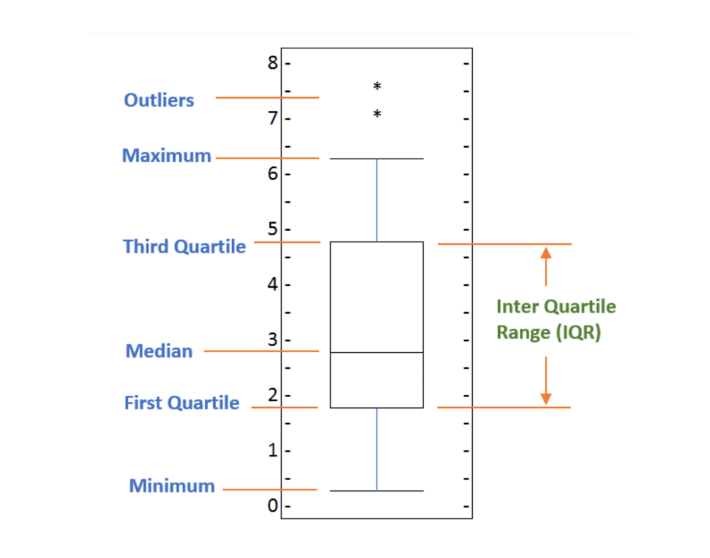

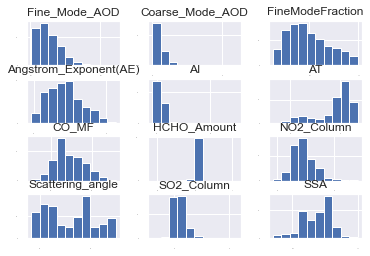

In [174]:
# histograms
data1.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1)
plt.show()

In [215]:
# identify outliers in the training dataset
Prom_col = list(data1.columns)
Prom_col.remove('Aerosol_Type')
def remove_outliers(df,columns,n_std):
    for col in columns:
        mean = df[col].mean()
        sd = df[col].std()
        df[col] = df[col].apply(lambda x: x if x <= mean+(n_std*sd) else np.nan)
    return df
data1 = remove_outliers(data1,Prom_col,1)
data1.reset_index(drop=True, inplace=True)
data1.head(5)

,Fine_Mode_AOD,Coarse_Mode_AOD,FineModeFraction,Angstrom_Exponent(AE),AI,AT,CO_MF,HCHO_Amount,NO2_Column,Scattering_angle,SO2_Column,SSA,Aerosol_Type
0,NaN,NaN,0.257638,0.046911,1.25,297.203186,132.400611,3.780000e+15,2.030000e+15,147.560772,0.01,0.96,UN
1,0.191937,NaN,0.245434,0.076761,1.41,299.078400,NaN,5.420000e+14,1.350000e+15,152.073428,-0.02,0.94,DU
2,0.148843,NaN,0.211106,0.128248,1.32,300.142120,NaN,1.960000e+15,2.040000e+15,101.697066,0.06,0.95,UN
3,0.179571,NaN,0.228706,0.214991,1.31,300.032562,NaN,5.710000e+15,2.990000e+15,NaN,0.37,0.93,DU
4,0.190570,0.289585,0.396209,0.381665,-0.05,304.467529,133.802315,3.680000e+15,2.080000e+15,146.463070,-0.05,0.94,DU


In [176]:
#Replacing naN with mean
Prom_col = list(data1.columns)
Prom_col.remove('Aerosol_Type')
def remove_nan(df,columns):
    for col in columns:
        mean2 = df[col].mean()
        df[col].replace(np.nan, mean2, inplace=True)
    return df
data1 = remove_nan(data1,Prom_col)
data1.reset_index(drop=True, inplace=True)
data1.head(5)

,Fine_Mode_AOD,Coarse_Mode_AOD,FineModeFraction,Angstrom_Exponent(AE),AI,AT,CO_MF,HCHO_Amount,NO2_Column,Scattering_angle,SO2_Column,SSA,Aerosol_Type
0,0.103478,0.143064,0.257638,0.046911,1.25,297.203186,132.400611,3.780000e+15,2.030000e+15,147.560772,0.01,0.96,UN
1,0.191937,0.143064,0.245434,0.076761,1.41,299.078400,115.830972,5.420000e+14,1.350000e+15,152.073428,-0.02,0.94,DU
2,0.148843,0.143064,0.211106,0.128248,1.32,300.142120,115.830972,1.960000e+15,2.040000e+15,101.697066,0.06,0.95,UN
3,0.179571,0.143064,0.228706,0.214991,1.31,300.032562,115.830972,5.710000e+15,2.990000e+15,122.161897,0.37,0.93,DU
4,0.190570,0.289585,0.396209,0.381665,-0.05,304.467529,133.802315,3.680000e+15,2.080000e+15,146.463070,-0.05,0.94,DU


In [216]:
#Replacing naN with MICE
lr = LinearRegression()
imp = IterativeImputer(estimator=lr,missing_values=np.nan, max_iter=10, verbose=0, imputation_order='roman',random_state=0)
Prom_col = list(data1.columns)
Prom_col.remove('Aerosol_Type')
data1.drop('Aerosol_Type' , axis = 1, inplace=True)
data1=imp.fit_transform(data1)
data1 = pd.DataFrame(data1, columns = Prom_col)
data1.head(5)

[IterativeImputer] Completing matrix with shape (1020, 12)
[IterativeImputer] Ending imputation round 1/10, elapsed time 0.02
[IterativeImputer] Change: 1.1935233548191382e+16, scaled tolerance: 1140000000000000.0 
[IterativeImputer] Ending imputation round 2/10, elapsed time 0.03
[IterativeImputer] Change: 5718112376747832.0, scaled tolerance: 1140000000000000.0 
[IterativeImputer] Ending imputation round 3/10, elapsed time 0.05
[IterativeImputer] Change: 2086242714403536.0, scaled tolerance: 1140000000000000.0 
[IterativeImputer] Ending imputation round 4/10, elapsed time 0.06
[IterativeImputer] Change: 1370322076755024.0, scaled tolerance: 1140000000000000.0 
[IterativeImputer] Ending imputation round 5/10, elapsed time 0.07
[IterativeImputer] Change: 1370103648568008.0, scaled tolerance: 1140000000000000.0 
[IterativeImputer] Ending imputation round 6/10, elapsed time 0.09
[IterativeImputer] Change: 2559492470981864.0, scaled tolerance: 1140000000000000.0 
[IterativeImputer] Ending

,Fine_Mode_AOD,Coarse_Mode_AOD,FineModeFraction,Angstrom_Exponent(AE),AI,AT,CO_MF,HCHO_Amount,NO2_Column,Scattering_angle,SO2_Column,SSA
0,0.119155,0.177612,0.257638,0.046911,1.25,297.203186,132.400611,3.780000e+15,2.030000e+15,147.560772,0.01,0.96
1,0.191937,0.170670,0.245434,0.076761,1.41,299.078400,115.055134,5.420000e+14,1.350000e+15,152.073428,-0.02,0.94
2,0.148843,0.119378,0.211106,0.128248,1.32,300.142120,115.833791,1.960000e+15,2.040000e+15,101.697066,0.06,0.95
3,0.179571,0.161341,0.228706,0.214991,1.31,300.032562,117.572125,5.710000e+15,2.990000e+15,119.535128,0.37,0.93
4,0.190570,0.289585,0.396209,0.381665,-0.05,304.467529,133.802315,3.680000e+15,2.080000e+15,146.463070,-0.05,0.94


In [222]:
data2 = pd.read_csv('data_final_updated.csv')
data3 = pd.concat([data1, data2['Aerosol_Type']], axis = 1)
data1 = data3
data3.head(5)

,Fine_Mode_AOD,Coarse_Mode_AOD,FineModeFraction,Angstrom_Exponent(AE),AI,AT,CO_MF,HCHO_Amount,NO2_Column,Scattering_angle,SO2_Column,SSA,Aerosol_Type
0,0.119155,0.177612,0.257638,0.046911,1.25,297.203186,132.400611,3.780000e+15,2.030000e+15,147.560772,0.01,0.96,UN
1,0.191937,0.170670,0.245434,0.076761,1.41,299.078400,115.055134,5.420000e+14,1.350000e+15,152.073428,-0.02,0.94,DU
2,0.148843,0.119378,0.211106,0.128248,1.32,300.142120,115.833791,1.960000e+15,2.040000e+15,101.697066,0.06,0.95,UN
3,0.179571,0.161341,0.228706,0.214991,1.31,300.032562,117.572125,5.710000e+15,2.990000e+15,119.535128,0.37,0.93,DU
4,0.190570,0.289585,0.396209,0.381665,-0.05,304.467529,133.802315,3.680000e+15,2.080000e+15,146.463070,-0.05,0.94,DU


In [223]:
data1.shape

(1020, 13)

# identify outliers in the training dataset
Prom_col = list(data1.columns)
Prom_col.remove('Aerosol_Type')
def remove_outliers(df,columns,n_std):
    for col in columns:
        mean = df[col].mean()
        sd = df[col].std()
        df = df[(df[col] <= mean+(n_std*sd))]
    return df
data1 = remove_outliers(data1,Prom_col,1)
data1.reset_index(drop=True, inplace=True)
data1.head(5)

In [224]:
scaler = MinMaxScaler(feature_range=(0, 1))
Prom_col = list(data1.columns)
Prom_col.remove('Aerosol_Type')
for col in Prom_col:
    data1[col] = data1[col].astype(float)
    data1[[col]] = scaler.fit_transform(data1[[col]])
data1.head(2)

,Fine_Mode_AOD,Coarse_Mode_AOD,FineModeFraction,Angstrom_Exponent(AE),AI,AT,CO_MF,HCHO_Amount,NO2_Column,Scattering_angle,SO2_Column,SSA,Aerosol_Type
0,0.541914,0.445981,0.230269,0.083645,0.920354,0.776024,0.882637,0.985423,0.651131,0.900584,0.653226,1.000000,UN
1,0.892468,0.428511,0.208716,0.105258,0.991150,0.823236,0.609690,0.982633,0.465794,0.972743,0.629032,0.777778,DU


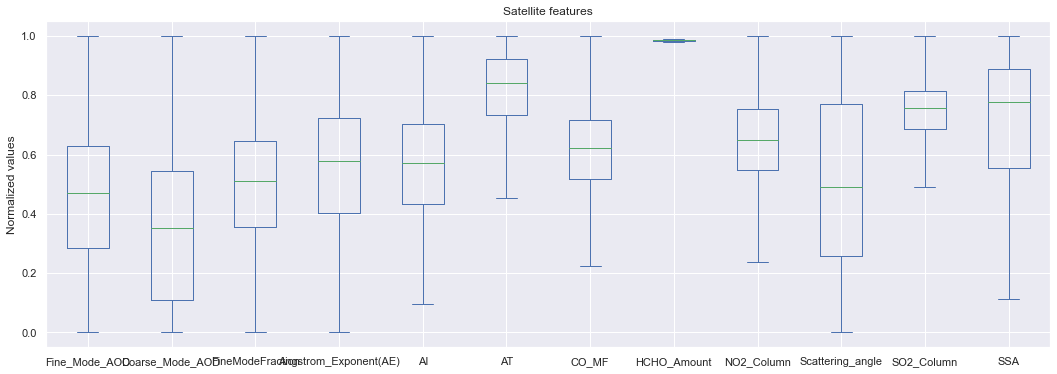

In [225]:
data1.plot(kind='box', figsize=(18, 6), showfliers = False)

plt.title('Satellite features')
plt.ylabel('Normalized values')

plt.show()

In [226]:
#To check if missing values exist(True shows the existence and position of missing values)
missing_data =data1.isnull()
missing_data.head(2)

,Fine_Mode_AOD,Coarse_Mode_AOD,FineModeFraction,Angstrom_Exponent(AE),AI,AT,CO_MF,HCHO_Amount,NO2_Column,Scattering_angle,SO2_Column,SSA,Aerosol_Type
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False


In [227]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")

Fine_Mode_AOD
False    1020
Name: Fine_Mode_AOD, dtype: int64

Coarse_Mode_AOD
False    1020
Name: Coarse_Mode_AOD, dtype: int64

FineModeFraction
False    1020
Name: FineModeFraction, dtype: int64

Angstrom_Exponent(AE)
False    1020
Name: Angstrom_Exponent(AE), dtype: int64

AI
False    1020
Name: AI, dtype: int64

AT
False    1020
Name: AT, dtype: int64

CO_MF
False    1020
Name: CO_MF, dtype: int64

HCHO_Amount
False    1020
Name: HCHO_Amount, dtype: int64

NO2_Column
False    1020
Name: NO2_Column, dtype: int64

Scattering_angle
False    1020
Name: Scattering_angle, dtype: int64

SO2_Column
False    1020
Name: SO2_Column, dtype: int64

SSA
False    1020
Name: SSA, dtype: int64

Aerosol_Type
False    1020
Name: Aerosol_Type, dtype: int64



In [228]:
# simply drop whole row with NaN in "price" column
data1.dropna(axis=0, inplace=True)

# reset index, because we droped two rows
data1.reset_index(drop=True, inplace=True)
data1.head(2)

,Fine_Mode_AOD,Coarse_Mode_AOD,FineModeFraction,Angstrom_Exponent(AE),AI,AT,CO_MF,HCHO_Amount,NO2_Column,Scattering_angle,SO2_Column,SSA,Aerosol_Type
0,0.541914,0.445981,0.230269,0.083645,0.920354,0.776024,0.882637,0.985423,0.651131,0.900584,0.653226,1.000000,UN
1,0.892468,0.428511,0.208716,0.105258,0.991150,0.823236,0.609690,0.982633,0.465794,0.972743,0.629032,0.777778,DU


In [229]:
data1.shape

(1020, 13)

In [230]:
#The data is exported for use in the exploration and modelling section
data1.to_csv (r'C:\Users\ismai\OneDrive\Desktop\UMBC_Courses\DATA 602\Research_project\Data_Code_ML\Modelling\clean_data3.csv', index = None, header=True)

<AxesSubplot:xlabel='Aerosol_Type', ylabel='count'>

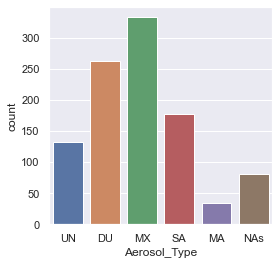

In [231]:
#Lets visualize the Target
sns.set(rc={'figure.figsize':(4,4)})
sns.countplot(x='Aerosol_Type', data =data1)

Text(0, 0.5, 'Normalized values')

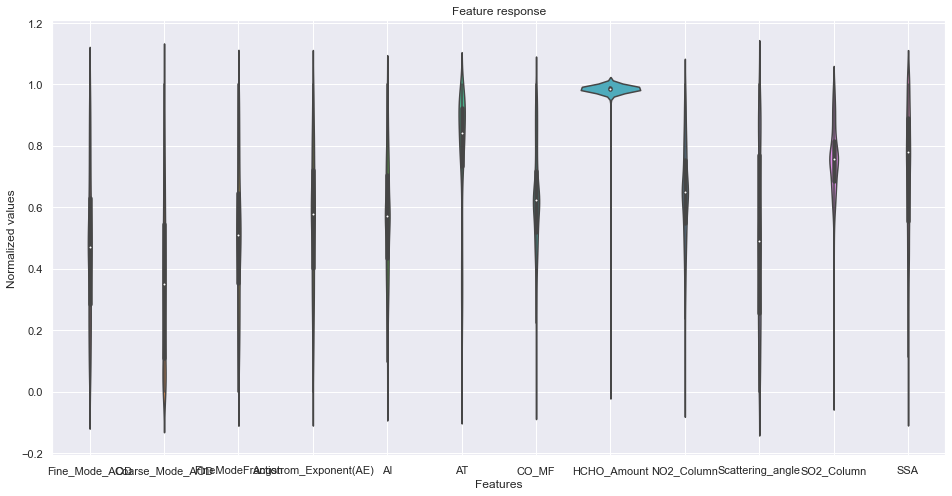

In [232]:
fig, ax = plt.subplots(figsize =(16, 8)) 
sns.violinplot(ax = ax, data = data1.iloc[:, 0:12], showmeans=False, showmedians=True)
ax.xaxis.grid(True)
ax.yaxis.grid(True)

# add title and axis labels
ax.set_title('Feature response')
ax.set_xlabel('Features')
ax.set_ylabel('Normalized values')

<AxesSubplot:>

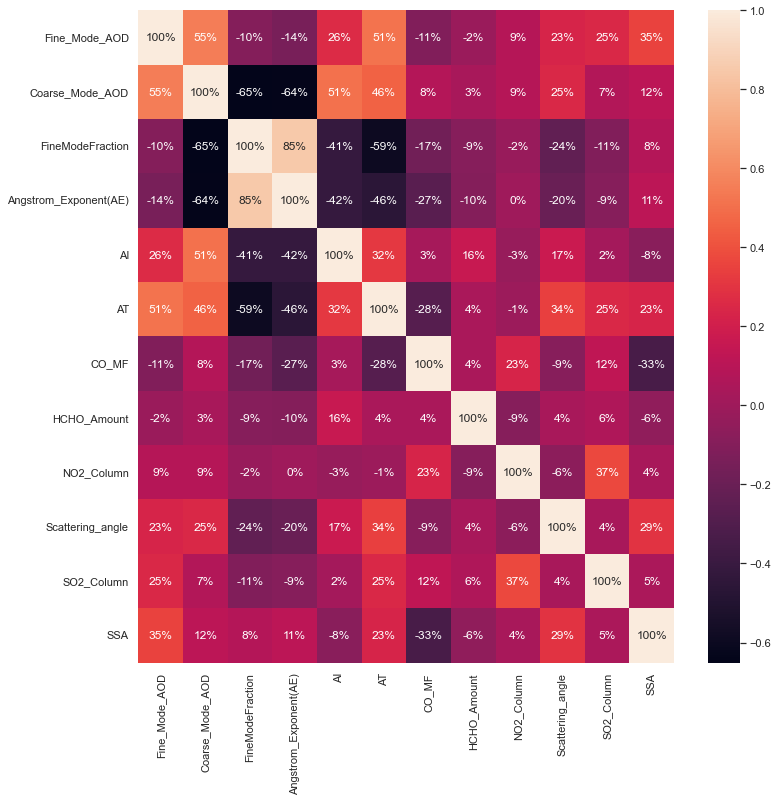

In [20]:
#Let's visualize the correlation of the features
plt.figure(figsize=(12,12))
sns.heatmap(data1.corr(), annot=True, fmt='.0%')